# What's the weather?

## Observations

### 1)  From the trend in "Latitude vs Max Temp" graph, the temperature climbs when approaching the equator from both North and South poles.

### 2)  From the graph "Latitude vs Humidity", humidities vary among cities located at the same latitude (likely due to a number of other factors that affect humidity).  

### 3)  The graph "Latitude vs Wind Speed" shows that most cities near the equator have wind speeds below 20 mph.  However, this isn't to imply that wind speed is only correlated to latitude as there are likely many other aspects that contribute to wind speed (topography, elevation, etc.)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import random
from citipy import citipy

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
#SAVED CSV AFTER DATA RETRIEVAL
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

## Perform API Calls

In [3]:
#to ensure that the lat and long was pulling
latlon = pd.DataFrame({"Latitude":lats, "Longitude":lngs})
latlon.head()

,Latitude,Longitude
0,-28.112963,104.908575
1,32.639943,33.583825
2,55.040900,-58.798091
3,-0.106807,100.416816
4,-32.593197,126.976818


In [4]:
latlon["Closest City Name"] = ""
latlon["Closest Country Code"] = ""
for index,row in latlon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    latlon.set_value(index,"Closest City Name",city.city_name)
    latlon.set_value(index,"Closest Country Code",city.country_code.upper())
#I'll look at these accessors later

C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [6]:
#set sample size at 1500
#dropping duplicate cities

Ulatlon = latlon.dropna()
Ulatlon = Ulatlon.drop_duplicates()

sampcit = Ulatlon.sample(1500)
sampcit = sampcit.reset_index()
sampcit = sampcit.iloc[:,[3,4]]
sampcit.head()

,Closest City Name,Closest Country Code
0,umm jarr,SD
1,saint george,BM
2,rikitea,PF
3,ushuaia,AR
4,mount gambier,AU


In [7]:
gen_cit = sampcit.sample(n=1500)
gen_cit

,Closest City Name,Closest Country Code
32,taolanaro,MG
160,albany,AU
173,bima,ID
1208,ushuaia,AR
864,saldanha,ZA
346,cururupu,BR
1084,vostok,RU
428,xinyang,CN
1319,hobart,AU
1029,soyo,AO


In [8]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"appid" :api_key,"units":"imperial"}


In [9]:
#set query conditions for data retrieval

print("------------------------------------------------------------------")
print("Beginning Data Retrieval")
print("----------------------------------------------------------------\n")

for index,row in sampcit.iterrows():
    #"q" for query
    params["q"] =f'{row["Closest City Name"]},{row["Closest Country Code"]}'
    print(f"Processing Record {index+1} of {len(gen_cit)} | for City,Country: {params['q']}")
    #"CW" = city weather query
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()
    #first I ran this loop to determine if the correct number of records with 
    #city, country, and openweathermap API would pull.  Once I determined this
    #worked, then I added this code to pull the specific data for each record:
    
    gen_cit.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    gen_cit.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    gen_cit.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    gen_cit.set_value(index,"Max Temperature",CWRespJson.get("main",{}).get("temp_max"))
    gen_cit.set_value(index,"Wind Speed",CWRespJson.get("wind",{}).get("speed"))
    gen_cit.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    gen_cit.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))#lon
    gen_cit.set_value(index,"Date",CWRespJson.get("dt"))
    



print("--------------------------------------------------------------------")
print("End Data Retrieval")
print("--------------------------------------------------------------------\n")

------------------------------------------------------------------
Beginning Data Retrieval
----------------------------------------------------------------

Processing Record 1 of 1500 | for City,Country: umm jarr,SD
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=umm+jarr%2CSD
Processing Record 2 of 1500 | for City,Country: saint george,BM


C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bhart\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bhart\Anaconda\lib\site-pa

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint+george%2CBM
Processing Record 3 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 4 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 5 of 1500 | for City,Country: mount gambier,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mount+gambier%2CAU
Processing Record 6 of 1500 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 7 of 1500 | for City,Country: malyn,UA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=malyn%2

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=utiroa%2CKI
Processing Record 49 of 1500 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 50 of 1500 | for City,Country: nerchinskiy zavod,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nerchinskiy+zavod%2CRU
Processing Record 51 of 1500 | for City,Country: port elizabeth,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=port+elizabeth%2CZA
Processing Record 52 of 1500 | for City,Country: bluff,NZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=bluff%2CNZ
Processing Record 53 of 1500 | for City,Country: xining,CN
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=port+elizabeth%2CZA
Processing Record 96 of 1500 | for City,Country: carnarvon,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=carnarvon%2CAU
Processing Record 97 of 1500 | for City,Country: asau,TV
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=asau%2CTV
Processing Record 98 of 1500 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kapaa%2CUS
Processing Record 99 of 1500 | for City,Country: nagato,JP
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nagato%2CJP
Processing Record 100 of 1500 | for City,Country: ribeira grande,PT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ribeira+gr

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=bluff%2CNZ
Processing Record 143 of 1500 | for City,Country: salina cruz,MX
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=salina+cruz%2CMX
Processing Record 144 of 1500 | for City,Country: kodiak,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kodiak%2CUS
Processing Record 145 of 1500 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=jamestown%2CSH
Processing Record 146 of 1500 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 147 of 1500 | for City,Country: rurrenabaque,BO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=barrow%2CUS
Processing Record 189 of 1500 | for City,Country: nome,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nome%2CUS
Processing Record 190 of 1500 | for City,Country: lhuntshi,BT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=lhuntshi%2CBT
Processing Record 191 of 1500 | for City,Country: faya,TD
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=faya%2CTD
Processing Record 192 of 1500 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=busselton%2CAU
Processing Record 193 of 1500 | for City,Country: mahebourg,MU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mahebourg%2CMU
Pr

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sal+rei%2CCV
Processing Record 235 of 1500 | for City,Country: upernavik,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=upernavik%2CGL
Processing Record 236 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 237 of 1500 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kapaa%2CUS
Processing Record 238 of 1500 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 239 of 1500 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=busselton%2CAU
P

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=butaritari%2CKI
Processing Record 282 of 1500 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 283 of 1500 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 284 of 1500 | for City,Country: bluff,NZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=bluff%2CNZ
Processing Record 285 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 286 of 1500 | for City,Country: norman wells,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=norman+wells%2

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=panzhihua%2CCN
Processing Record 328 of 1500 | for City,Country: namibe,AO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=namibe%2CAO
Processing Record 329 of 1500 | for City,Country: ustye,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ustye%2CRU
Processing Record 330 of 1500 | for City,Country: sinkat,SD
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sinkat%2CSD
Processing Record 331 of 1500 | for City,Country: vila,VU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=vila%2CVU
Processing Record 332 of 1500 | for City,Country: porto torres,IT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=porto+torres%2CIT
P

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=riyadh%2CSA
Processing Record 374 of 1500 | for City,Country: qaqortoq,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=qaqortoq%2CGL
Processing Record 375 of 1500 | for City,Country: terra santa,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=terra+santa%2CBR
Processing Record 376 of 1500 | for City,Country: airai,PW
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=airai%2CPW
Processing Record 377 of 1500 | for City,Country: hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hithadhoo%2CMV
Processing Record 378 of 1500 | for City,Country: phek,IN
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=phek%2

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=svetlaya%2CRU
Processing Record 420 of 1500 | for City,Country: bambous virieux,MU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=bambous+virieux%2CMU
Processing Record 421 of 1500 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=port+alfred%2CZA
Processing Record 422 of 1500 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 423 of 1500 | for City,Country: saint-philippe,RE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint-philippe%2CRE
Processing Record 424 of 1500 | for City,Country: san cristobal,EC
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=fuerte%2CPH
Processing Record 466 of 1500 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=punta+arenas%2CCL
Processing Record 467 of 1500 | for City,Country: husavik,IS
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=husavik%2CIS
Processing Record 468 of 1500 | for City,Country: hermanus,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hermanus%2CZA
Processing Record 469 of 1500 | for City,Country: trairi,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=trairi%2CBR
Processing Record 470 of 1500 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=c

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=shimoda%2CJP
Processing Record 512 of 1500 | for City,Country: chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=chuy%2CUY
Processing Record 513 of 1500 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=cape+town%2CZA
Processing Record 514 of 1500 | for City,Country: praia da vitoria,PT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=praia+da+vitoria%2CPT
Processing Record 515 of 1500 | for City,Country: lebu,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=lebu%2CCL
Processing Record 516 of 1500 | for City,Country: kaeo,NZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kaeo%

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=cape+town%2CZA
Processing Record 558 of 1500 | for City,Country: narsaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=narsaq%2CGL
Processing Record 559 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 560 of 1500 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 561 of 1500 | for City,Country: mitsamiouli,KM
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mitsamiouli%2CKM
Processing Record 562 of 1500 | for City,Country: chokurdakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=c

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=huanren%2CCN
Processing Record 605 of 1500 | for City,Country: ukiah,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ukiah%2CUS
Processing Record 606 of 1500 | for City,Country: skibbereen,IE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=skibbereen%2CIE
Processing Record 607 of 1500 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=cape+town%2CZA
Processing Record 608 of 1500 | for City,Country: tokat,TR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tokat%2CTR
Processing Record 609 of 1500 | for City,Country: panvel,IN
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=panvel%2CIN

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 652 of 1500 | for City,Country: pokrovsk-uralskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=pokrovsk-uralskiy%2CRU
Processing Record 653 of 1500 | for City,Country: hermanus,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hermanus%2CZA
Processing Record 654 of 1500 | for City,Country: upernavik,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=upernavik%2CGL
Processing Record 655 of 1500 | for City,Country: omboue,GA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=omboue%2CGA
Processing Record 656 of 1500 | for City,Country: bathsheba,BB
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&uni

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=naze%2CJP
Processing Record 698 of 1500 | for City,Country: paamiut,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=paamiut%2CGL
Processing Record 699 of 1500 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=jamestown%2CSH
Processing Record 700 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 701 of 1500 | for City,Country: ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ponta+do+sol%2CCV
Processing Record 702 of 1500 | for City,Country: upernavik,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 744 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 745 of 1500 | for City,Country: sao jose da coroa grande,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sao+jose+da+coroa+grande%2CBR
Processing Record 746 of 1500 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=punta+arenas%2CCL
Processing Record 747 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 748 of 1500 | for City,Country: mazara del vallo,IT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hervey+bay%2CAU
Processing Record 790 of 1500 | for City,Country: thompson,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=thompson%2CCA
Processing Record 791 of 1500 | for City,Country: pangody,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=pangody%2CRU
Processing Record 792 of 1500 | for City,Country: tiksi,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tiksi%2CRU
Processing Record 793 of 1500 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=punta+arenas%2CCL
Processing Record 794 of 1500 | for City,Country: georgetown,SH
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=punta+arenas%2CCL
Processing Record 836 of 1500 | for City,Country: grand gaube,MU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=grand+gaube%2CMU
Processing Record 837 of 1500 | for City,Country: sabang,ID
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sabang%2CID
Processing Record 838 of 1500 | for City,Country: tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tuktoyaktuk%2CCA
Processing Record 839 of 1500 | for City,Country: palana,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=palana%2CRU
Processing Record 840 of 1500 | for City,Country: airai,PW
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=laguna%2CBR
Processing Record 883 of 1500 | for City,Country: new norfolk,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=new+norfolk%2CAU
Processing Record 884 of 1500 | for City,Country: avarua,CK
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=avarua%2CCK
Processing Record 885 of 1500 | for City,Country: kavieng,PG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kavieng%2CPG
Processing Record 886 of 1500 | for City,Country: conway,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=conway%2CUS
Processing Record 887 of 1500 | for City,Country: port elizabeth,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=po

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mahebourg%2CMU
Processing Record 929 of 1500 | for City,Country: esperance,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=esperance%2CAU
Processing Record 930 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 931 of 1500 | for City,Country: saint-philippe,RE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint-philippe%2CRE
Processing Record 932 of 1500 | for City,Country: sheridan,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sheridan%2CUS
Processing Record 933 of 1500 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=im

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=moche%2CPE
Processing Record 975 of 1500 | for City,Country: nikolskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nikolskoye%2CRU
Processing Record 976 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 977 of 1500 | for City,Country: henties bay,NA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=henties+bay%2CNA
Processing Record 978 of 1500 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=taolanaro%2CMG
Processing Record 979 of 1500 | for City,Country: geraldton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=amboasary%2CMG
Processing Record 1021 of 1500 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=albany%2CAU
Processing Record 1022 of 1500 | for City,Country: nagato,JP
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nagato%2CJP
Processing Record 1023 of 1500 | for City,Country: kieta,PG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kieta%2CPG
Processing Record 1024 of 1500 | for City,Country: barrow,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=barrow%2CUS
Processing Record 1025 of 1500 | for City,Country: klaksvik,FO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=klaksvik%2CFO


http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=yerbogachen%2CRU
Processing Record 1067 of 1500 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hobart%2CAU
Processing Record 1068 of 1500 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 1069 of 1500 | for City,Country: ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ponta+do+sol%2CCV
Processing Record 1070 of 1500 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=busselton%2CAU
Processing Record 1071 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=im

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=busselton%2CAU
Processing Record 1113 of 1500 | for City,Country: cayenne,GF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=cayenne%2CGF
Processing Record 1114 of 1500 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 1115 of 1500 | for City,Country: upernavik,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=upernavik%2CGL
Processing Record 1116 of 1500 | for City,Country: amderma,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=amderma%2CRU
Processing Record 1117 of 1500 | for City,Country: vila velha,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=vila

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=egvekinot%2CRU
Processing Record 1159 of 1500 | for City,Country: high rock,BS
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=high+rock%2CBS
Processing Record 1160 of 1500 | for City,Country: damietta,EG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=damietta%2CEG
Processing Record 1161 of 1500 | for City,Country: grand river south east,MU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=grand+river+south+east%2CMU
Processing Record 1162 of 1500 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=busselton%2CAU
Processing Record 1163 of 1500 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158c

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mapiripan%2CCO
Processing Record 1205 of 1500 | for City,Country: thompson,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=thompson%2CCA
Processing Record 1206 of 1500 | for City,Country: isangel,VU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=isangel%2CVU
Processing Record 1207 of 1500 | for City,Country: klaksvik,FO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=klaksvik%2CFO
Processing Record 1208 of 1500 | for City,Country: dianopolis,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=dianopolis%2CBR
Processing Record 1209 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kargasok%2CRU
Processing Record 1251 of 1500 | for City,Country: tongren,CN
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tongren%2CCN
Processing Record 1252 of 1500 | for City,Country: severo-kurilsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=severo-kurilsk%2CRU
Processing Record 1253 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 1254 of 1500 | for City,Country: riachao das neves,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=riachao+das+neves%2CBR
Processing Record 1255 of 1500 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a3

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=jamestown%2CSH
Processing Record 1298 of 1500 | for City,Country: amderma,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=amderma%2CRU
Processing Record 1299 of 1500 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 1300 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 1301 of 1500 | for City,Country: malinovoye ozero,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=malinovoye+ozero%2CRU
Processing Record 1302 of 1500 | for City,Country: wanlaweyn,SO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&un

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hithadhoo%2CMV
Processing Record 1345 of 1500 | for City,Country: hihifo,TO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hihifo%2CTO
Processing Record 1346 of 1500 | for City,Country: sikonge,TZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sikonge%2CTZ
Processing Record 1347 of 1500 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=taolanaro%2CMG
Processing Record 1348 of 1500 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=taolanaro%2CMG
Processing Record 1349 of 1500 | for City,Country: velizh,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tasiilaq%2CGL
Processing Record 1392 of 1500 | for City,Country: lebu,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=lebu%2CCL
Processing Record 1393 of 1500 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 1394 of 1500 | for City,Country: saint-pierre,PM
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint-pierre%2CPM
Processing Record 1395 of 1500 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=busselton%2CAU
Processing Record 1396 of 1500 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=maragua%2CKE
Processing Record 1439 of 1500 | for City,Country: saint-philippe,RE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint-philippe%2CRE
Processing Record 1440 of 1500 | for City,Country: denpasar,ID
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=denpasar%2CID
Processing Record 1441 of 1500 | for City,Country: avarua,CK
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=avarua%2CCK
Processing Record 1442 of 1500 | for City,Country: batangafo,CF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=batangafo%2CCF
Processing Record 1443 of 1500 | for City,Country: praia da vitoria,PT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b141549

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=khonuu%2CRU
Processing Record 1486 of 1500 | for City,Country: san cristobal,EC
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=san+cristobal%2CEC
Processing Record 1487 of 1500 | for City,Country: ilulissat,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ilulissat%2CGL
Processing Record 1488 of 1500 | for City,Country: tuatapere,NZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tuatapere%2CNZ
Processing Record 1489 of 1500 | for City,Country: senador jose porfirio,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=senador+jose+porfirio%2CBR
Processing Record 1490 of 1500 | for City,Country: codrington,AG
http://api.openweathermap.org/data/2.5/weather?appid=cc3b481

In [10]:
gen_cit.head()

,Closest City Name,Closest Country Code,Latitude,Longitude,Temperature,Max Temperature,Wind Speed,Humidity,Cloudiness,Date
32,taolanaro,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,albany,AU,-35.02,117.88,117.88,53.40,11.65,73.0,36.0,1.538483e+09
173,bima,ID,-8.45,118.73,118.73,76.08,3.60,91.0,0.0,1.538483e+09
1208,ushuaia,AR,-54.81,-68.31,-68.31,33.80,23.04,86.0,90.0,1.538481e+09
864,saldanha,ZA,-33.01,17.94,17.94,66.20,17.22,67.0,20.0,1.538482e+09


In [11]:
gen_cit.to_csv("City_Weather_data.csv")

In [12]:

#gen_cit = gen_cit.DataFrame({"City":sampcit["Closest City Name"],
                           #"Cloudiness":sampcit["Cloudiness"],
                           #"Country":sampcit["Closest Country Code"],
                           #"Date":sampcit["Date"],
                           #"Humidity":sampcit["Humidity"],
                           #"Lat":sampcit["Latitude"],
                           #"Lng":sampcit["Longitude"],
                           #"Temp Max":sampcit["Max Temperature"],
                           #"Wind Speed":sampcit["Wind Speed"]})

gen_cit.count()

#cityweather

Closest City Name       1500
Closest Country Code    1500
Latitude                1310
Longitude               1310
Temperature             1310
Max Temperature         1310
Wind Speed              1310
Humidity                1310
Cloudiness              1310
Date                    1310
dtype: int64

In [13]:
gen_cit = gen_cit.dropna()
gen_cit = gen_cit.drop_duplicates()

In [14]:
gen_cit.count()

Closest City Name       577
Closest Country Code    577
Latitude                577
Longitude               577
Temperature             577
Max Temperature         577
Wind Speed              577
Humidity                577
Cloudiness              577
Date                    577
dtype: int64

In [15]:
gen_cit["Date"]=gen_cit["Date"].astype('int')
gen_cit.head()

,Closest City Name,Closest Country Code,Latitude,Longitude,Temperature,Max Temperature,Wind Speed,Humidity,Cloudiness,Date
160,albany,AU,-35.02,117.88,117.88,53.40,11.65,73.0,36.0,1538483253
173,bima,ID,-8.45,118.73,118.73,76.08,3.60,91.0,0.0,1538483255
1208,ushuaia,AR,-54.81,-68.31,-68.31,33.80,23.04,86.0,90.0,1538480580
864,saldanha,ZA,-33.01,17.94,17.94,66.20,17.22,67.0,20.0,1538481600
346,cururupu,BR,-1.82,-44.87,-44.87,87.33,12.44,62.0,44.0,1538483284


## Temperature (F) vs. Latitude

<function matplotlib.pyplot.show(*args, **kw)>

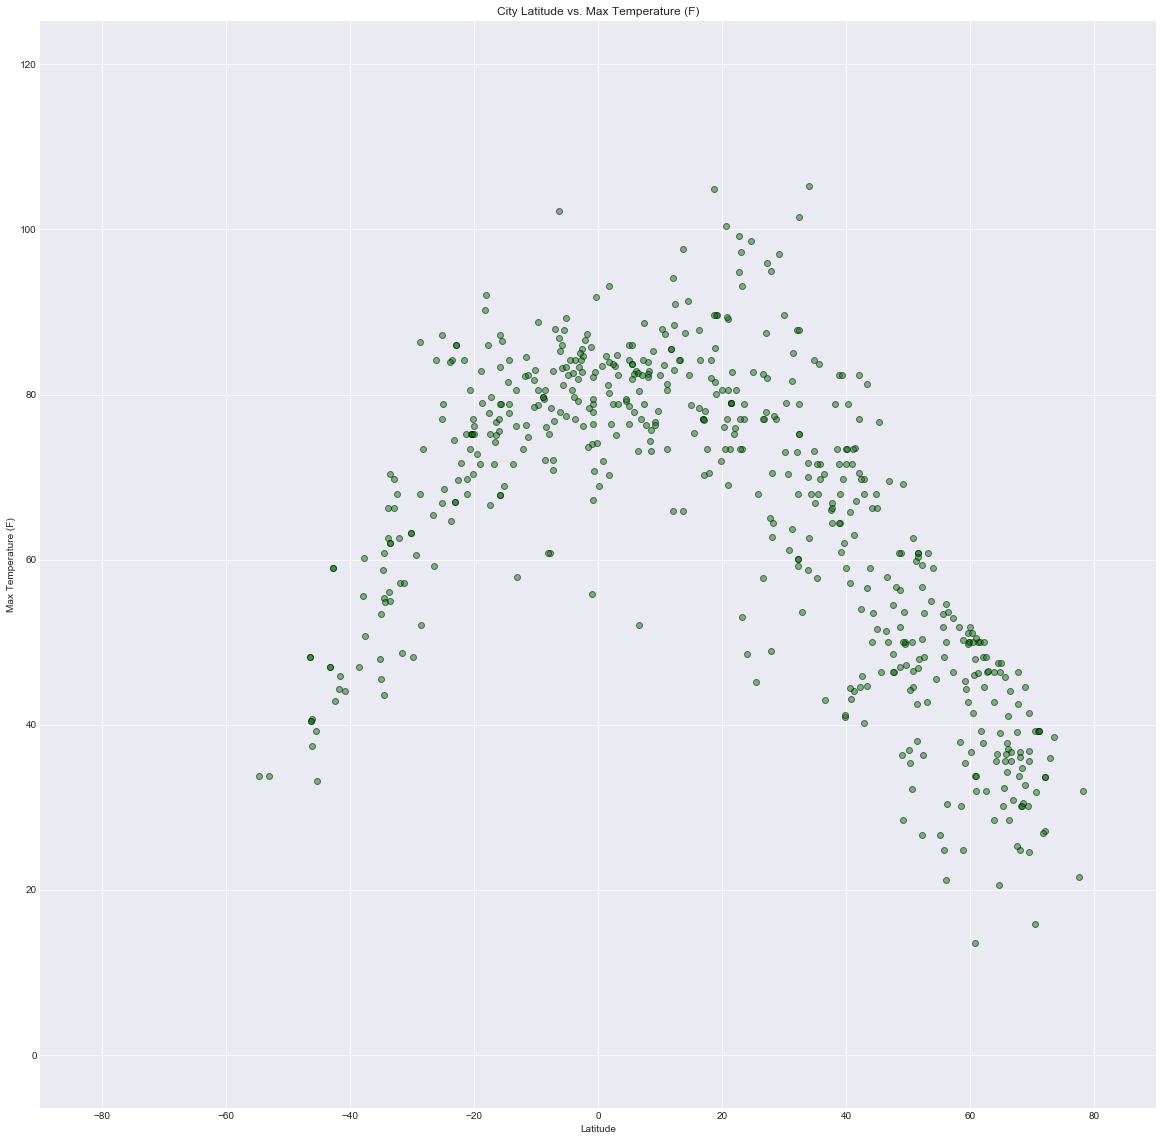

In [18]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(gen_cit['Latitude'], gen_cit['Max Temperature'], c='green', alpha=0.5, linewidth=1, edgecolor='black')

ax.set_xlim(-90,90)
ax.set_ylim(min(gen_cit['Max Temperature'])-20, max(gen_cit['Max Temperature'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (F)")

plt.savefig("citylatmaxtemp.png")
plt.show

## Humidity(%) vs. Latitude

<function matplotlib.pyplot.show(*args, **kw)>

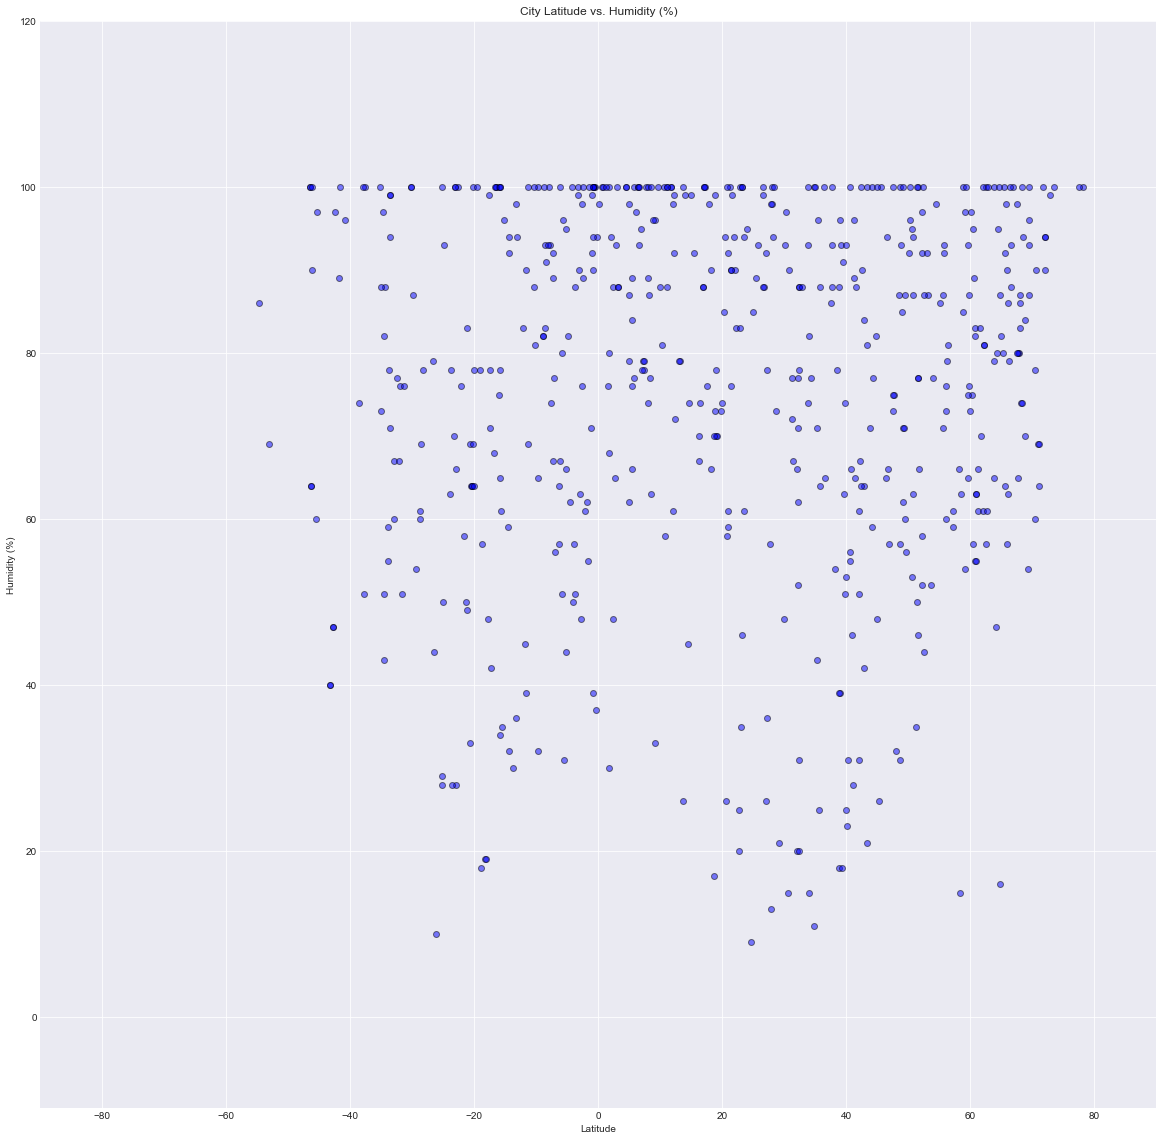

In [20]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(gen_cit['Latitude'], gen_cit['Humidity'], c='blue', alpha=0.5, linewidth=1, edgecolor='black')

ax.set_xlim(-90,90)
ax.set_ylim(min(gen_cit['Humidity'])-20, max(gen_cit['Humidity'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs. Humidity (%)")

plt.savefig("citylathumidity.png")
plt.show

## Cloudiness (%) vs. Latitude

<function matplotlib.pyplot.show(*args, **kw)>

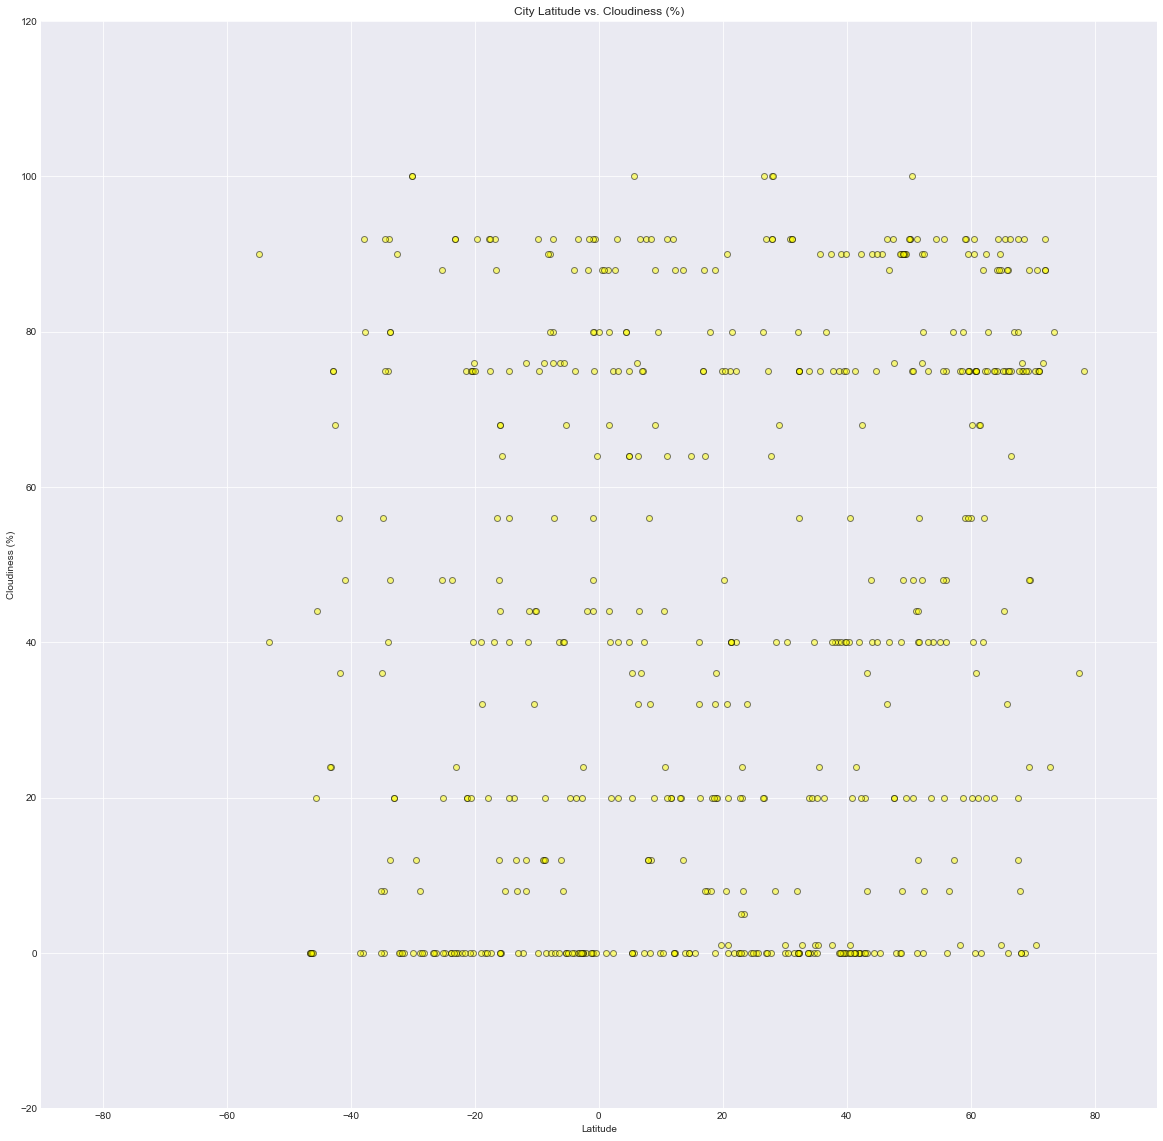

In [21]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(gen_cit['Latitude'], gen_cit['Cloudiness'], c='yellow', alpha=0.5, linewidth=1, edgecolor='black')

ax.set_xlim(-90,90)
ax.set_ylim(min(gen_cit['Cloudiness'])-20, max(gen_cit['Cloudiness'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (%)")

plt.savefig("citylatcloud.png")
plt.show

## Wind Speed (mph) vs. Latitude

<function matplotlib.pyplot.show(*args, **kw)>

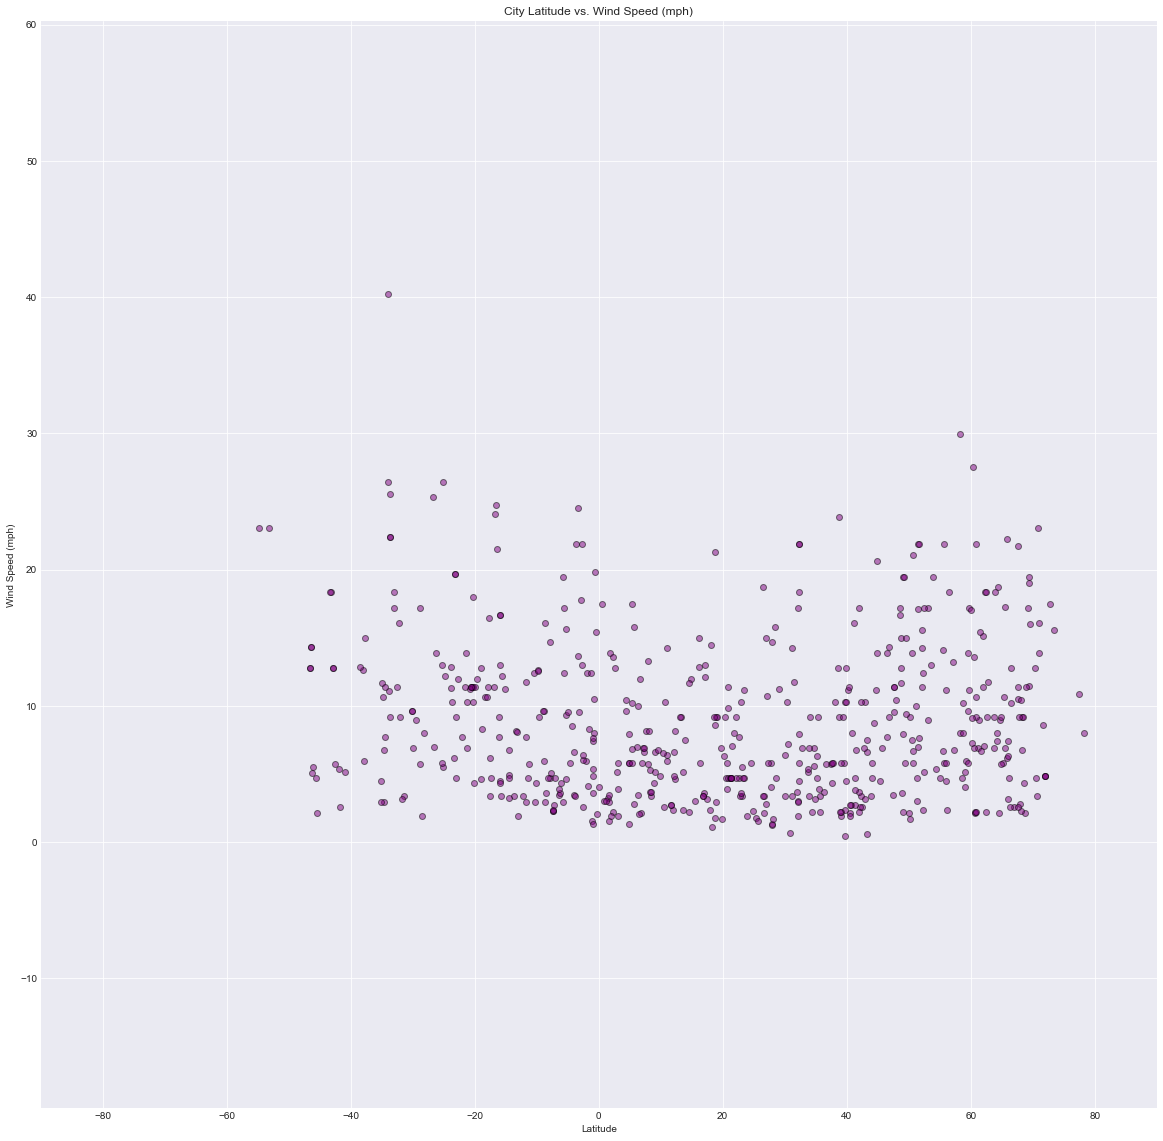

In [22]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(gen_cit['Latitude'], gen_cit['Wind Speed'], c='purple', alpha=0.5, linewidth=1, edgecolor='black')

ax.set_xlim(-90,90)
ax.set_ylim(min(gen_cit['Wind Speed'])-20, max(gen_cit['Wind Speed'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (mph)")

plt.savefig("citylatwind.png")
plt.show